# LSE Data Analytics Online Career Accelerator
# DA301: Advanced Analytics for Organisational Impact

# Make predictions with regression.

# 1. Load and explore the data

In [1]:
# Install the statsmodels package.
!pip install statsmodels

# Import the necessary libraries.
import numpy as np
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# The statsmodels
import statsmodels.api as sm 
from statsmodels.formula.api import ols

# Import and read the data file (turtle_reviews.csv file)

reviews = pd.read_csv('turtle_reviews.csv')

print (reviews.head())
print (reviews.info())

reviews.describe ()

print(reviews.dtypes)  # Print the data types of each column
print("\nMetadata:")
print(reviews.info())  # Print metadata about the DataFrame

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

In [2]:
# Determine whether there are any missing values in the DataFrame.

print("\nmissing values:")

# Check for missing values in each column

print(reviews.isnull().sum()) 


missing values:
gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [3]:
# Create a summary of the descriptive statistics.
print("\nDescriptive Statistics:")

# Generate summary statistics of the DataFrame

print(reviews.describe())  


Descriptive Statistics:
               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  


# 2. Drop columns

In [4]:
# Remove redundant columns (language and platform)

reviews = reviews.drop(['language', 'platform'], axis=1)

print (reviews.head())

reviews

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this sp

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


# 3. Rename columns

In [5]:
# Change column headings to names that are easier to reference (e.g. renumeration and spending_score).

reviews = reviews.rename(columns={'remuneration (k£)' : 'Total Income (k£)', 'spending_score (1-100)': 'Spending_score', 'loyalty_points': 'Loyalty points', 'education' : 'Education'})

reviews.head ()

,gender,age,Total Income (k£),Spending_score,Loyalty points,Education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


# 4. Save the DataFrame as a CSV file

In [6]:
# Save a copy of the clean DataFrame as a CSV file.

reviews.to_csv('clean_reviews.csv', index=False)

In [7]:
# Import the file to sense-check (e.g. shape or metadata).
clean_reviews = pd.read_csv('clean_reviews.csv')
print("\nClean DataFrame:")
print(clean_reviews.info())  # Print metadata about the clean DataFrame
print("\nClean DataFrame Shape:")
print(clean_reviews.shape)  # Print the shape (rows, columns) of the clean DataFrame


Clean DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2000 non-null   object 
 1   age                2000 non-null   int64  
 2   Total Income (k£)  2000 non-null   float64
 3   Spending_score     2000 non-null   int64  
 4   Loyalty points     2000 non-null   int64  
 5   Education          2000 non-null   object 
 6   product            2000 non-null   int64  
 7   review             2000 non-null   object 
 8   summary            2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None

Clean DataFrame Shape:
(2000, 9)


In [8]:
print (reviews.head())
print (reviews.info())

reviews.describe ()

print(reviews.dtypes)  # Print the data types of each column
print("\nMetadata:")
print(reviews.info())  # Print metadata about the DataFrame

   gender  age  Total Income (k£)  Spending_score  Loyalty points Education  \
0    Male   18              12.30              39             210  graduate   
1    Male   23              12.30              81             524  graduate   
2  Female   22              13.12               6              40  graduate   
3  Female   25              13.12              77             562  graduate   
4  Female   33              13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dun

# 5. Linear regression

# 5a) spending Score vs loyalty

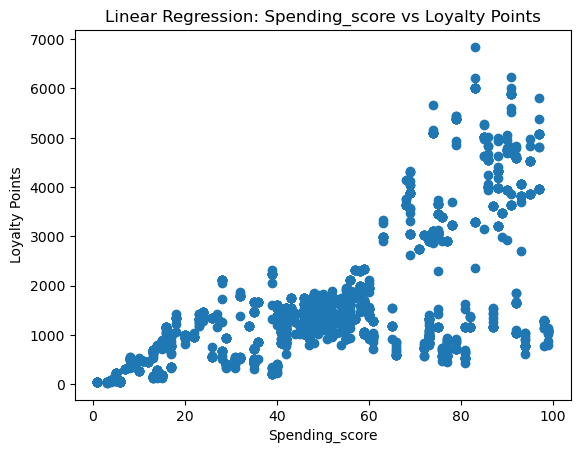

In [9]:
# Use linear regression or multiple linear regression to evaluate possible linear relationships.
# Specify the independent and dependent variables.
# Dependent variable.
y = clean_reviews["Loyalty points"] 

# Independent variable.
X = clean_reviews["Spending_score"]

# Check for linearity.
plt.scatter(X,y)
plt.xlabel('Spending_score')
plt.ylabel('Loyalty Points')
plt.title('Linear Regression: Spending_score vs Loyalty Points')
plt.show()

In [10]:
# Run the OLS model.
f = 'y ~ X'
test = ols(f, data = clean_reviews).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          2.92e-263
Time:                        22:38:59   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
X            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
X             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [12]:
# Set the X coefficient and the constant to generate the regression table.
X = sm.add_constant(X)  # Add a constant (intercept) to the independent variables
model = sm.OLS(y, X).fit()  # Fit the linear regression model
coefficients = model.params  # Get the coefficients (slope and intercept)
# View the output.

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Loyalty points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          2.92e-263
Time:                        22:38:59   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -75.0527     45.931     -1.

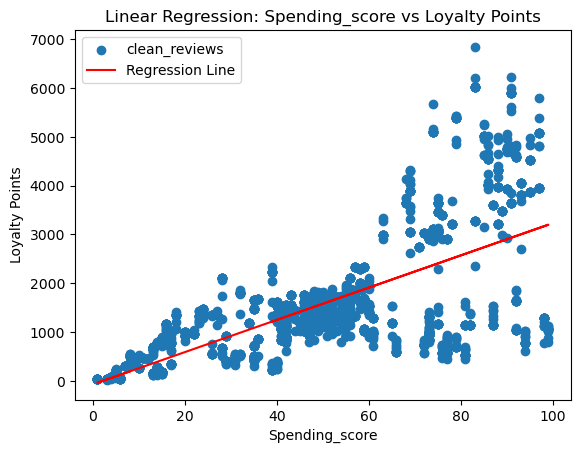

In [13]:
# Plot the graph with a regression line
# Scatter plot of the data points
# Plot the regression line
plt.scatter(X['Spending_score'], y, label='clean_reviews')  
plt.plot(X['Spending_score'], X.dot(coefficients), color='red', label='Regression Line')  
plt.xlabel('Spending_score')
plt.ylabel('Loyalty Points')
plt.title('Linear Regression: Spending_score vs Loyalty Points')
plt.legend()
plt.show()

# 5b) Total Income vs loyalty

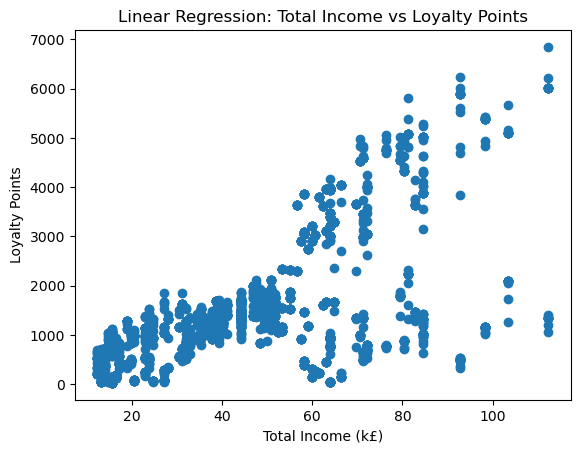

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          2.43e-209
Time:                        22:38:59   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Dependent variable.
y = clean_reviews["Loyalty points"] 

# Independent variable.
X = clean_reviews["Total Income (k£)"]

# Check for linearity.
plt.scatter(X,y)
plt.xlabel('Total Income (k£)')
plt.ylabel('Loyalty Points')
plt.title('Linear Regression: Total Income vs Loyalty Points')
plt.show()

# Run the OLS model.
f = 'y ~ X'
test = ols(f, data = clean_reviews).fit()

# View the output.
test.summary()


In [15]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -65.686513
X            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
X             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [16]:
# Set the X coefficient and the constant to generate the regression table.
X = sm.add_constant(X)  # Add a constant (intercept) to the independent variables
model = sm.OLS(y, X).fit()  # Fit the linear regression model
coefficients = model.params  # Get the coefficients (slope and intercept)
# View the output.

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Loyalty points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          2.43e-209
Time:                        22:38:59   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -65.6865     52.17

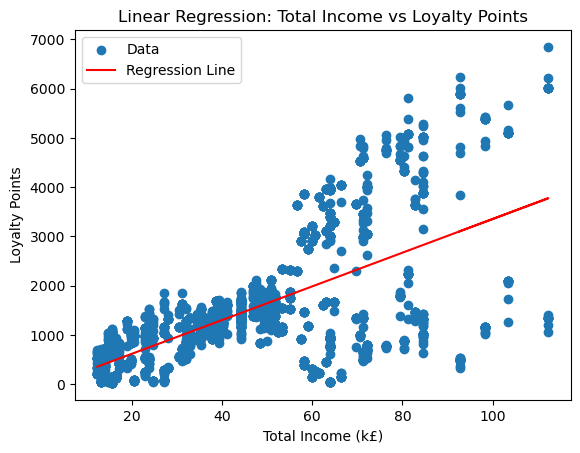

In [17]:
# Plot the graph with a regression line
plt.scatter(X['Total Income (k£)'], y, label='Data')  # Scatter plot of the data points
plt.plot(X['Total Income (k£)'], X.dot(coefficients), color='red', label='Regression Line')  # Plot the regression line
plt.xlabel('Total Income (k£)')
plt.ylabel('Loyalty Points')
plt.title('Linear Regression: Total Income vs Loyalty Points')
plt.legend()
# View the plot.
plt.show()

# 5c) Age vs loyalty

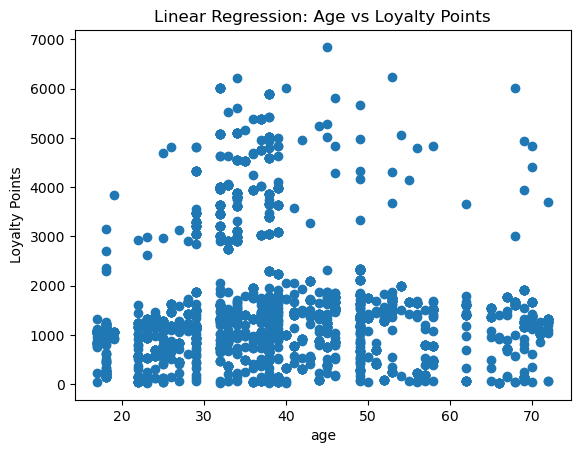

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 23 Jul 2023   Prob (F-statistic):             0.0577
Time:                        22:39:00   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Dependent variable.
y = clean_reviews["Loyalty points"] 

# Independent variable.
X = clean_reviews["age"]

# Check for linearity.
plt.scatter(X,y)
plt.xlabel('age')
plt.ylabel('Loyalty Points')
plt.title('Linear Regression: Age vs Loyalty Points')
plt.show()

# Run the OLS model.
f = 'y ~ X'
test = ols(f, data = clean_reviews).fit()
# View the output.
test.summary()

In [19]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    1736.517739
X              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
X             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [20]:
# Set the X coefficient and the constant to generate the regression table.
X = sm.add_constant(X)  # Add a constant (intercept) to the independent variables
model = sm.OLS(y, X).fit()  # Fit the linear regression model
coefficients = model.params  # Get the coefficients (slope and intercept)
# View the output.

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Loyalty points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 23 Jul 2023   Prob (F-statistic):             0.0577
Time:                        22:39:00   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

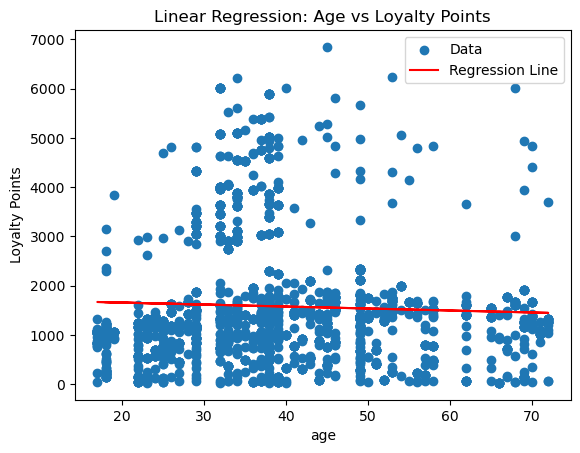

In [21]:
# Plot the graph with a regression line
plt.scatter(X['age'], y, label='Data')  # Scatter plot of the data points
plt.plot(X['age'], X.dot(coefficients), color='red', label='Regression Line')  # Plot the regression line
plt.xlabel('age')
plt.ylabel('Loyalty Points')
plt.title('Linear Regression: Age vs Loyalty Points')
plt.legend()
# View the plot.
plt.show()

# 6. Observations and insights

<span style="font-size: 14px;">
    # Our analysis focused on customer loyalty points and product impact on sales using predictive modeling. We used Python's statsmodel and OLS libraries for linear regression, revealing strong positive correlations between loyalty points and spending score, total income, while age had a weaker association. To boost loyalty and sales, Turtle Games should target high-spending and high-income customers. These insights can inform targeted marketing strategies and loyalty programs, driving overall sales performance and customer retention.


# 2. Clustering with k-means using Python

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Load and explore the data¶

In [23]:
# Import the necessary libraries, and prepare the data for clustering.
data = pd.read_csv('clean_reviews.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2000 non-null   object 
 1   age                2000 non-null   int64  
 2   Total Income (k£)  2000 non-null   float64
 3   Spending_score     2000 non-null   int64  
 4   Loyalty points     2000 non-null   int64  
 5   Education          2000 non-null   object 
 6   product            2000 non-null   int64  
 7   review             2000 non-null   object 
 8   summary            2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [24]:
# Drop unnecessary columns

df2 = data.drop (columns =['gender', 'Education', 'Loyalty points', 'product', 'review', 'summary'])

# Display a summary of numeric variables

print (df2.columns)
df2.describe()

Index(['age', 'Total Income (k£)', 'Spending_score'], dtype='object')


,age,Total Income (k£),Spending_score
count,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000
std,13.573212,23.123984,26.094702
min,17.000000,12.300000,1.000000
25%,29.000000,30.340000,32.000000
50%,38.000000,47.150000,50.000000
75%,49.000000,63.960000,73.000000
max,72.000000,112.340000,99.000000


<Axes: xlabel='Total Income (k£)', ylabel='Spending_score'>

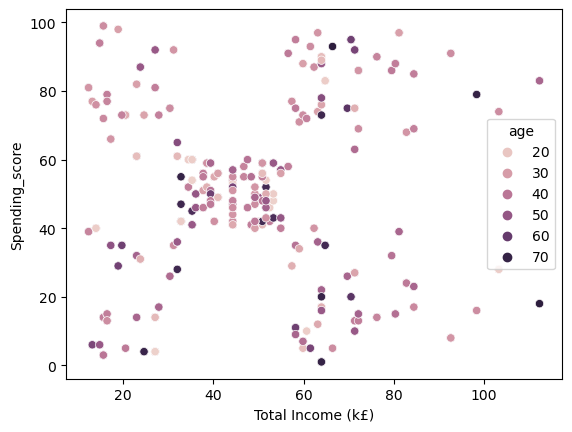

In [25]:
# Visualization 

import seaborn as sns

# Create scatterplot 

sns.scatterplot(x='Total Income (k£)',
                y='Spending_score',
                data=df2,
                hue='age')

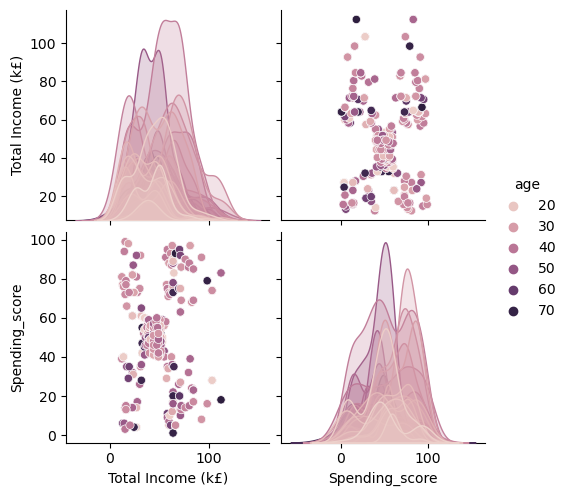

In [26]:
# Create a Pairplot using seaborn

x=df2[['Total Income (k£)','Spending_score']]
sns.pairplot(df2,
             vars=x,
             hue='age',
             diag_kind= 'kde')

# K Means Clusttering
# silhouette_& Elbow Method

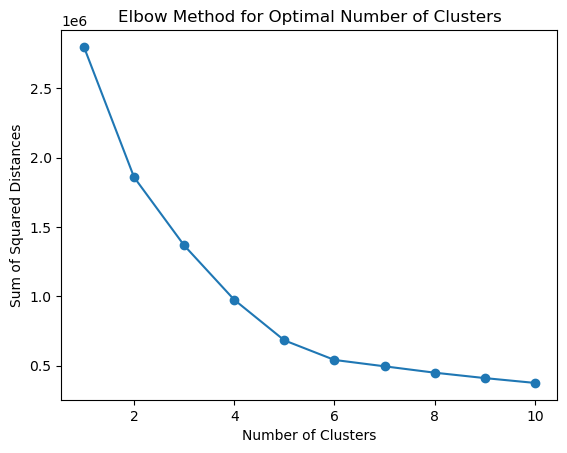

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++',
                    max_iter=100, 
                    n_init=10, 
                    random_state=0)
    kmeans.fit(df2)
    ss.append(kmeans.inertia_)

# Plot the elbow method. Plot the sum of squared distance from each point to its assigned center.
plt.plot(range(1, 11),
         ss, 
         marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

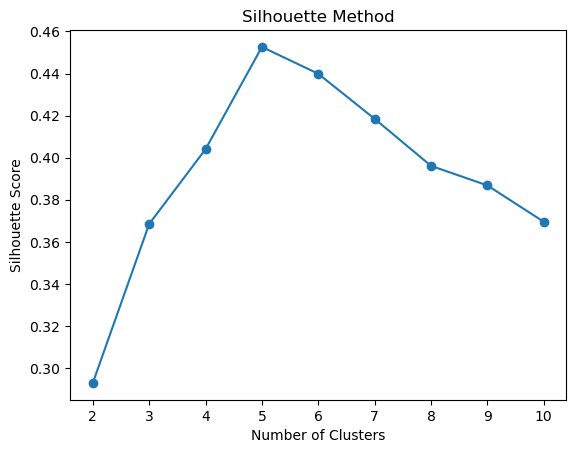

In [28]:
# import silhouette_score class from sklearn

from sklearn.metrics import silhouette_score

# Use the Silhouette to determine the optimal number of clusters.
# Find the range of clusters to be used in silhoutte method

kmax = 10
sil = []

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2, labels, metric='euclidean'))

# Plot the Silhouette method
plt.plot(range(2, kmax+1), 
         sil,
         marker= 'o')

# insert rows and tittles

plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show ()


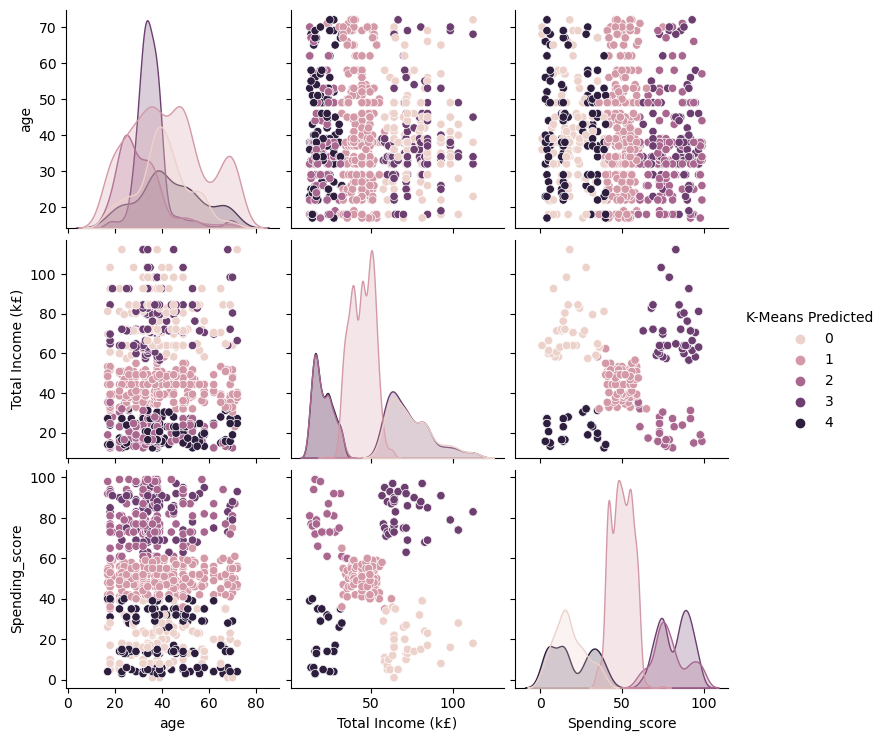

In [29]:
# Use 5 clusters

kmeans = KMeans(n_clusters=5, 
                    max_iter=300,
                    init='k-means++',
                    random_state=0).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted
sns.pairplot(df2,
            hue='K-Means Predicted',
            diag_kind= 'kde')

In [30]:
# check number of observations per predicted class

df2['K-Means Predicted'].value_counts()

1    769
3    356
0    337
4    270
2    268
Name: K-Means Predicted, dtype: int64

In [31]:
# View KMeans predicted

print (df2.head())

   age  Total Income (k£)  Spending_score  K-Means Predicted
0   18              12.30              39                  4
1   23              12.30              81                  2
2   22              13.12               6                  4
3   25              13.12              77                  2
4   33              13.94              40                  4


<Axes: xlabel='Total Income (k£)', ylabel='Spending_score'>

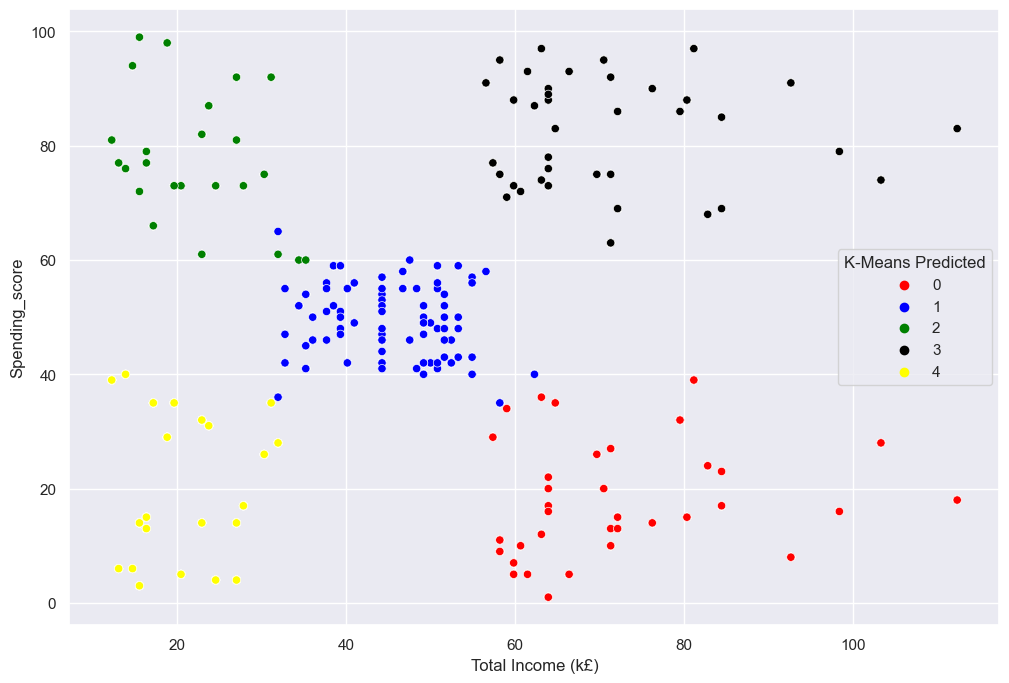

In [32]:
# Visulizing the clusters
# Set plot size

sns.set(rc={'figure.figsize' :(12,8)})
        
# Create a scatterplot
        
sns.scatterplot(x='Total Income (k£)',
                y='Spending_score', 
                hue='K-Means Predicted', 
                data=df2, 
                palette=['red', 'blue', 'green', 'black', 'yellow', ])

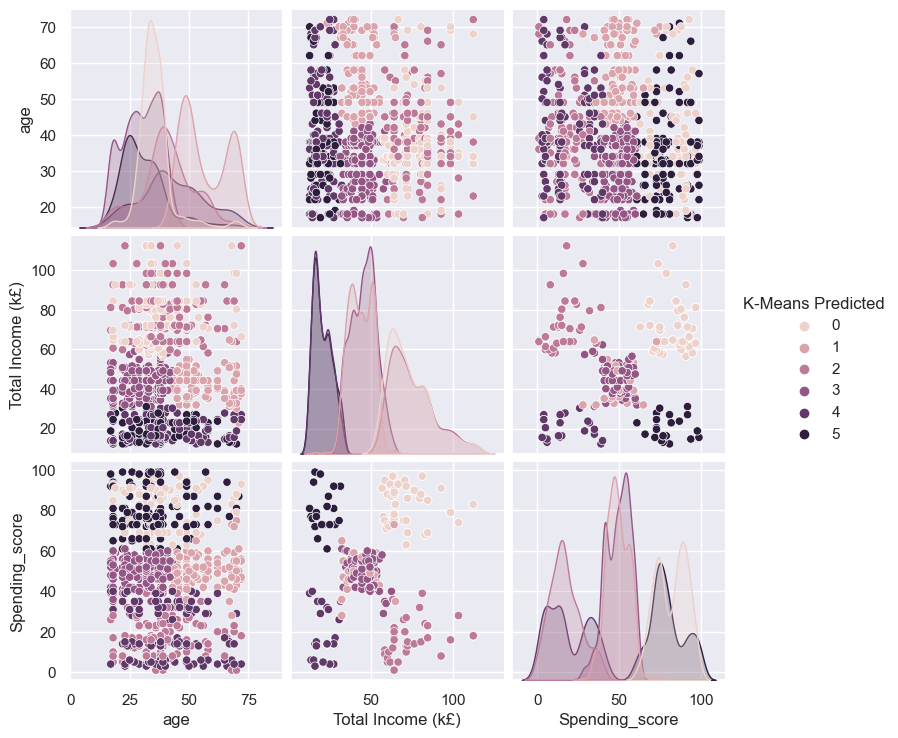

In [33]:
# Use 6 clusters

kmeans = KMeans(n_clusters=6, 
                    max_iter=300,
                    init='k-means++',
                    random_state=0).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted
sns.pairplot(df2,
            hue='K-Means Predicted',
            diag_kind= 'kde')

In [34]:
# check number of observations per predicted class

df2['K-Means Predicted'].value_counts()

3    424
1    374
0    355
2    322
5    264
4    261
Name: K-Means Predicted, dtype: int64

<Axes: xlabel='Total Income (k£)', ylabel='Spending_score'>

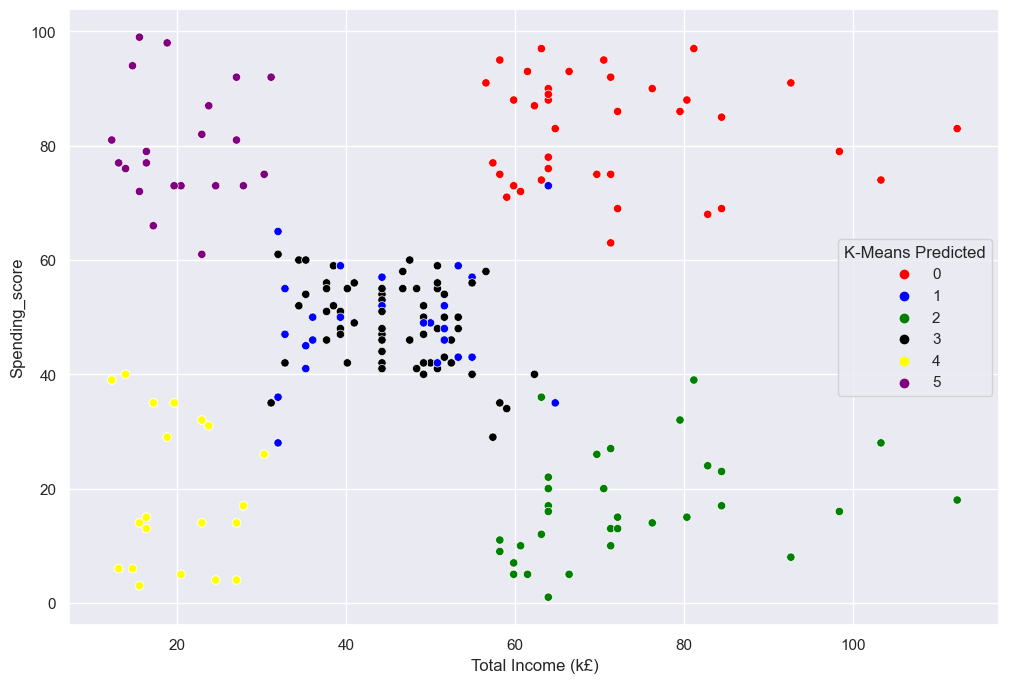

In [35]:
# Visulizing the clusters
# Set plot size

sns.set(rc={'figure.figsize' :(12,8)})
        
# Create a scatterplot
        
sns.scatterplot(x='Total Income (k£)',
                y='Spending_score', 
                hue='K-Means Predicted', 
                data=df2, 
                palette=['red', 'blue', 'green', 'black', 'yellow', 'purple' ])

# 7. Insights and observations

<span style="font-size: 14px;">
# We utilized K-Means clustering to identify customer groups: High Spenders (Green), Moderate Spenders (Blue), Low Spenders (Red), High Income (Yellow), and Low Income (Purple). By tailoring marketing and loyalty programs for each group, we can drive growth and enhance customer satisfaction effectively. These actionable insights enable us to focus on personalized strategies and offerings, optimizing sales performance and fostering long-term customer loyalty.

# NLP using Python

In [36]:
# Install NLTK.
!pip install nltk

# Import nltk and the required resources.
import nltk
nltk.download('punkt')         # Download the punkt tokenizer.
nltk.download('stopwords')     # Download the stopwords.
nltk.download('wordnet')       # Download the WordNetLemmatizer resource.

# Install the wordcloud package.
!pip install wordcloud

# Import the necessary libraries.
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shubhrabhanot/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shubhrabhanot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shubhrabhanot/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
## Import nltk and the required resources.
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words

nltk.download('stopwords')
nltk.download('words')
from nltk.tokenize import word_tokenize


# Prepare the data for sentiment analysis.
data = pd.read_csv('clean_reviews.csv')

# Sense-check the DataFrame.
# Print the first few rows of the DataFrame

print(data.head())  

   gender  age  Total Income (k£)  Spending_score  Loyalty points Education  \
0    Male   18              12.30              39             210  graduate   
1    Male   23              12.30              81             524  graduate   
2  Female   22              13.12               6              40  graduate   
3  Female   25              13.12              77             562  graduate   
4  Female   33              13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dun

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shubhrabhanot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/shubhrabhanot/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [38]:
# Retain only the review and summary columns.
Sentiment_data = data[['review', 'summary']]

print(Sentiment_data.head())  

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap  


In [39]:
# Determine whether there are any missing values.
# Check for missing values in each column
print(Sentiment_data.isnull().sum())  

review     0
summary    0
dtype: int64


In [40]:
stop_words = set(stopwords.words('english'))

In [41]:
# Some pre-processing:
#-- lets get every word
#-- lets convert it to lowercase
#-- only include if the word is alphanumeric and if it is in the list of English words, but is not a stopword.

# Prepare the data for NLP: lower case, remove punctuation, and drop duplicates.
Sentiment_data['review'] = Sentiment_data['review'].str.lower().str.replace('[^\w\s]', ' ')
Sentiment_data['summary'] = Sentiment_data['summary'].str.lower().str.replace('[^\w\s]', ' ')
data.drop_duplicates(inplace=True)
print(Sentiment_data.head())  

                                              review  \
0  when it comes to a dm s screen  the space on t...   
1  an open letter to galeforce9  \n\nyour unpaint...   
2  nice art  nice printing   why two panels are f...   
3  amazing buy  bought it as a gift for our new d...   
4  as my review of gf9 s previous screens these w...   

                                             summary  
0  the fact that 50  of this space is wasted on a...  
1  another worthless dungeon master s screen from...  
2                    pretty  but also pretty useless  
3                                         five stars  
4                                         money trap  


In [42]:
# Tokenize and create word clouds for the respective columns.
Sentiment_data_copy = Sentiment_data.copy()

# Tokenization
nltk.download('punkt')
Sentiment_data_copy['review'] = Sentiment_data_copy['review'].apply(nltk.word_tokenize)
Sentiment_data_copy['summary'] = Sentiment_data_copy['summary'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shubhrabhanot/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


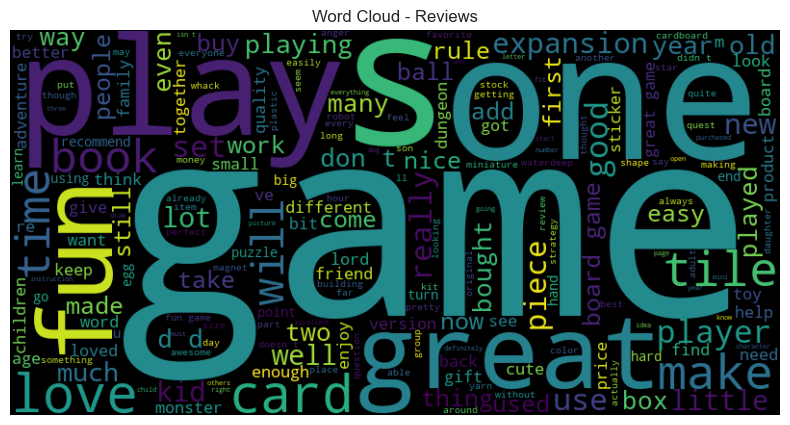

In [43]:
# Create and plot word cloud for review column
all_reviews = ' '.join(Sentiment_data_copy['review'].sum())
wordcloud = WordCloud(width=800, height=400).generate(all_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Reviews')
plt.show()

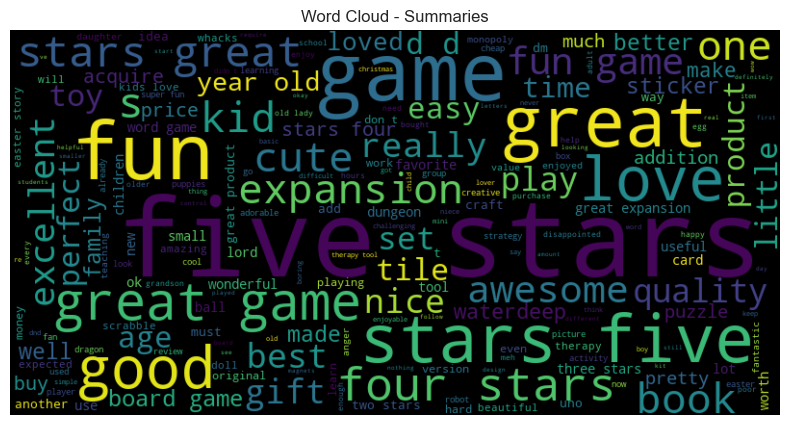

In [44]:
# Create and plot word cloud for summary column
all_summaries = ' '.join(Sentiment_data_copy['summary'].sum())
wordcloud = WordCloud(width=800, height=400).generate(all_summaries)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Summaries')
plt.show()

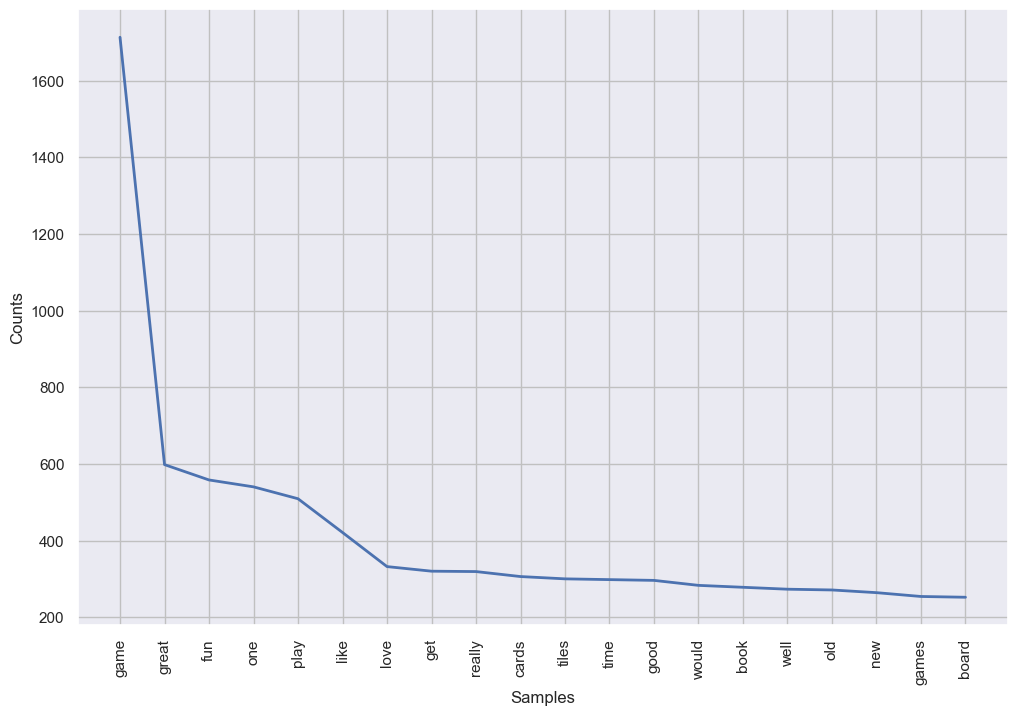

<Axes: xlabel='Samples', ylabel='Counts'>

In [45]:
# Determine the frequency distribution and polarity.
stop_words = set(stopwords.words('english'))
Sentiment_data_copy['review'] = Sentiment_data_copy['review'].apply(lambda x: [word for word in x if word not in stop_words])
Sentiment_data_copy['summary'] = Sentiment_data_copy['summary'].apply(lambda x: [word for word in x if word not in stop_words])

# Create frequency distribution for review column
all_words_review = [word for sublist in Sentiment_data_copy['review'].tolist() for word in sublist]
freq_dist_review = nltk.FreqDist(all_words_review)
freq_dist_review.plot(20)

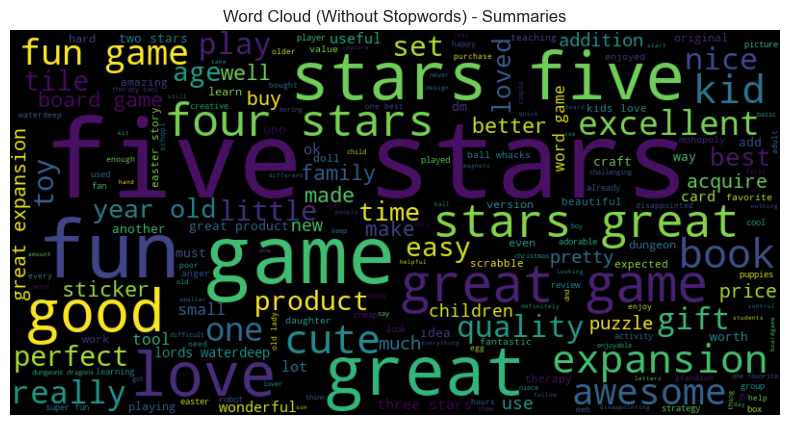

In [46]:
# Create word cloud without stopwords for summary column
all_words_summary = [word for sublist in Sentiment_data_copy['summary'].tolist() for word in sublist]
wordcloud = WordCloud(width=800, height=400).generate(' '.join(all_words_summary))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Without Stopwords) - Summaries')
plt.show()

In [47]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
    
# Calculate sentiment polarity for review and summary columns
sia = SentimentIntensityAnalyzer()
Sentiment_data_copy['review_polarity'] = Sentiment_data_copy['review'].apply(lambda x: sia.polarity_scores(' '.join(x))['compound'])
Sentiment_data_copy['summary_polarity'] = Sentiment_data_copy['summary'].apply(lambda x: sia.polarity_scores(' '.join(x))['compound'])


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shubhrabhanot/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Text(0.5, 1.0, 'Histogram of Polarity - Reviews')

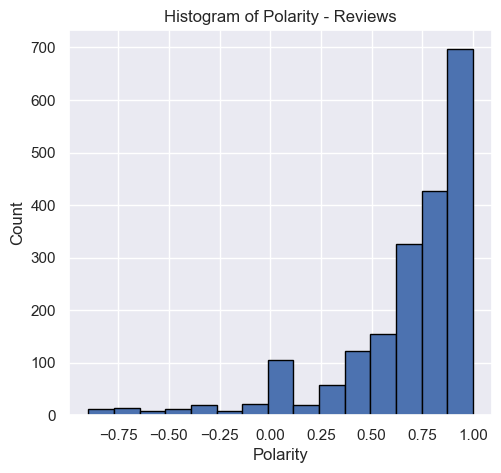

In [48]:
# Plot histograms of polarity for both columns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(Sentiment_data_copy['review_polarity'], bins=15, edgecolor='black')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Polarity - Reviews')

Text(0.5, 1.0, 'Histogram of Polarity - Summaries')

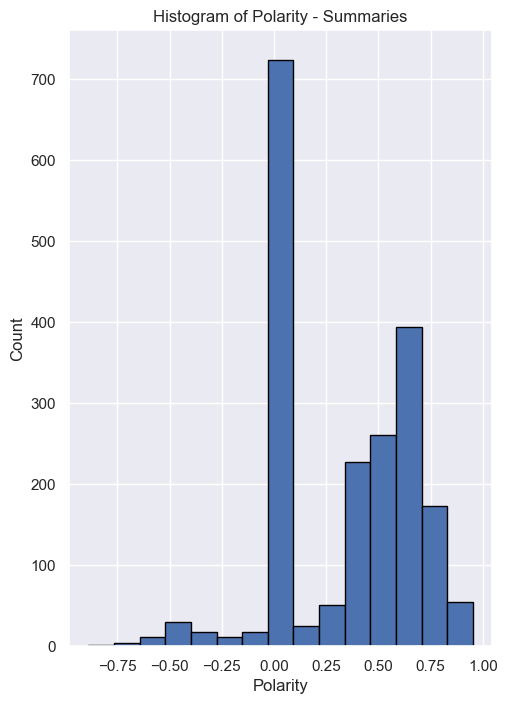

In [49]:
plt.subplot(1, 2, 2)
plt.hist(Sentiment_data_copy['summary_polarity'], bins=15, edgecolor='black')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Polarity - Summaries')

In [50]:
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

In [51]:
# Print the top 20 positive and negative reviews and summaries
top_positive_reviews = Sentiment_data_copy.nlargest(20, 'review_polarity')['review']
top_positive_summaries = Sentiment_data_copy.nlargest(20, 'summary_polarity')['summary']
top_negative_reviews = Sentiment_data_copy.nsmallest(20, 'review_polarity')['review']
top_negative_summaries = Sentiment_data_copy.nsmallest(20, 'summary_polarity')['summary']

print("Top 20 Positive Reviews:")
print(top_positive_reviews)

print("\nTop 20 Positive Summaries:")
print(top_positive_summaries)

print("\nTop 20 Negative Reviews:")
print(top_negative_reviews)

print("\nTop 20 Negative Summaries:")
print(top_negative_summaries)

Top 20 Positive Reviews:
1121    [disclaimer, bought, local, store, paid, list,...
879     [whenever, see, game, shelf, get, disturbing, ...
1666    [employ, one, creativity, enhancing, resource,...
358     [kit, awesome, 5, year, old, daughter, made, c...
1295    [lords, waterdeep, awesome, scoundrels, skullp...
1103    [middle, aged, married, guy, loves, sci, fi, v...
1570    [dad, two, boys, im, always, lookout, activiti...
836     [know, ive, ever, taken, delight, realizing, t...
1357    [lords, waterdeep, scoundrels, skullport, expa...
857     [grew, playing, monopoly, lots, people, unfort...
1063    [fan, dungeons, dragons, adventure, exploratio...
1097    [wife, kids, time, apart, gaming, group, thus,...
1112    [bought, game, 8, year, old, son, completely, ...
926     [skeptical, castle, ravenloft, despite, receiv...
1116    [short, short, version, wrath, ashardalon, exa...
1575    [doctor, card, game, created, martin, wallace,...
940     [bought, game, impulse, buy, barnes, no

# Insights and observations

<span style="font-size: 14px;">

    # Using Natural Language Processing (NLP), we analyzed customer reviews to understand sentiment and extract valuable insights for Turtle Games. After data preparation and sentiment analysis, we identified top positive and negative reviews, enabling us to gauge customer satisfaction and areas for improvement. The majority of reviews were positive, reflecting positive customer sentiment about the products and services offered. Positive sentiments highlighted factors like excellent product quality, prompt customer service, and enjoyable gaming experiences. However, we also observed some negative sentiments related to product defects and shipping delays. To maintain customer loyalty, we recommend addressing the issues mentioned in negative reviews and reinforcing the positive aspects to enhance customer satisfaction. Leveraging NLP-driven insights can guide marketing strategies and customer experience improvements, leading to increased customer satisfaction and ultimately boosting overall sales performance for Turtle Games.